# Playground for Advanced Topics Slides

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA 869

In [ ]:
import datetime
print(datetime.datetime.now())

In [2]:
import sklearn
sklearn.__version__

'0.23.1'

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Data

In [13]:
df = pd.read_csv('../data/GermanCredit.csv')
df['Class'] = df['Class'].map({'Good': 1, 'Bad': 0})
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Duration                                1000 non-null   int64
 1   Amount                                  1000 non-null   int64
 2   InstallmentRatePercentage               1000 non-null   int64
 3   ResidenceDuration                       1000 non-null   int64
 4   Age                                     1000 non-null   int64
 5   NumberExistingCredits                   1000 non-null   int64
 6   NumberPeopleMaintenance                 1000 non-null   int64
 7   Telephone                               1000 non-null   int64
 8   ForeignWorker                           1000 non-null   int64
 9   Class                                   1000 non-null   int64
 10  CheckingAccountStatus.lt.0              1000 non-null   int64
 11  CheckingAccountSta

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,1,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,0,1,0,0,1,0,0,1,0


In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection

In [15]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Helper function
def evaluate_with_dt(X_train, X_test, y_train, y_test):
    clf_full = DecisionTreeClassifier(random_state=0)
    clf_full.fit(X_train, y_train)
    y_pred_dt = clf_full.predict(X_test)
    print ("\n Confusion Matrix : \n", confusion_matrix(y_test, y_pred_dt))
    print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
    print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_dt)))
    print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_dt)))
    print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_dt)))

In [16]:
evaluate_with_dt(X_train, X_test, y_train['Class'], y_test['Class'])


 Confusion Matrix : 
 [[ 29  30]
 [ 34 107]]
Accuracy = 0.68
F1 Score = 0.77
Kappa = 0.25
Log Loss = 11.05


## Variance Threshold (Filter Method, Unsupervised)

In [17]:
X_train.shape

(800, 61)

In [18]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.1));
sel.fit(X_train);

In [19]:
sel.variances_
sel.get_support()
sum(sel.get_support())

array([1.39235975e+02, 8.38891826e+06, 1.25877500e+00, 1.22011094e+00,
       1.30061548e+02, 3.34623437e-01, 1.23085937e-01, 2.43600000e-01,
       3.37750000e-02, 1.95943750e-01, 1.95943750e-01, 5.74984375e-02,
       2.40735937e-01, 4.18359375e-02, 4.52437500e-02, 2.49375000e-01,
       8.29234375e-02, 2.06943750e-01, 1.81093750e-01, 9.39750000e-02,
       1.41923437e-01, 2.02693750e-01, 1.35609375e-02, 2.31859375e-02,
       4.41109375e-02, 0.00000000e+00, 8.67343750e-03, 8.89984375e-02,
       1.23437500e-02, 2.41443750e-01, 9.19937500e-02, 6.51000000e-02,
       4.63734375e-02, 1.51560938e-01, 1.39443750e-01, 2.23593750e-01,
       1.44375000e-01, 1.88743750e-01, 6.29437500e-02, 4.06937500e-02,
       2.16693750e-01, 2.47500000e-01, 8.19000000e-02, 0.00000000e+00,
       9.00000000e-02, 4.06937500e-02, 5.41937500e-02, 1.99375000e-01,
       1.79775000e-01, 2.23185937e-01, 1.30110937e-01, 1.17685938e-01,
       4.18359375e-02, 1.47600000e-01, 1.44375000e-01, 2.03235937e-01,
      

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True])

35

In [20]:
X_train_new = X_train.loc[:, sel.get_support()]
X_test_new = X_test.loc[:, sel.get_support()]

evaluate_with_dt(X_train_new, X_test_new, y_train['Class'], y_test['Class'])


 Confusion Matrix : 
 [[ 34  25]
 [ 30 111]]
Accuracy = 0.72
F1 Score = 0.80
Kappa = 0.35
Log Loss = 9.50


## Univariate Feature Selection (Filter Method, Supervised)

In [21]:
from sklearn.feature_selection import SelectKBest, chi2

sel = SelectKBest(chi2, k=10)
sel.fit(X_train, y_train)

SelectKBest(score_func=<function chi2 at 0x0000022A8414A2F0>)

In [22]:
sel.pvalues_
sel.get_support()

array([1.06823246e-48, 0.00000000e+00, 4.09363596e-01, 8.53102259e-01,
       5.61882097e-14, 6.44590179e-01, 9.63002992e-01, 5.97370086e-01,
       6.69852691e-01, 1.54978247e-09, 5.75839949e-03, 1.38203850e-01,
       4.52646515e-11, 4.45131086e-06, 1.90630991e-04, 3.67405390e-01,
       9.98219008e-01, 7.21676188e-06, 8.03585798e-03, 2.69078763e-02,
       8.92054990e-01, 2.23837345e-03, 6.52000750e-01, 8.90134400e-01,
       1.40549331e-02,            nan, 3.61033126e-01, 3.02894981e-01,
       1.70724193e-01, 2.01603259e-02, 3.00953646e-01, 4.53967611e-02,
       1.85022557e-02, 1.31559791e-02, 2.85051843e-02, 6.27098026e-01,
       3.40446647e-01, 2.27435459e-02, 1.60413012e-01, 3.02659985e-01,
       3.42272027e-02, 6.82146244e-02, 8.59320947e-01,            nan,
       8.64553871e-01, 5.11213923e-01, 2.15101186e-01, 1.06310578e-03,
       9.53731444e-01, 5.09482599e-01, 8.67207881e-04, 5.99308430e-03,
       3.65503443e-01, 1.83767520e-01, 6.31610930e-03, 1.53712588e-02,
      

array([ True,  True, False, False,  True, False, False, False, False,
        True, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False])

In [23]:
X_train_new = X_train.loc[:, sel.get_support()]
X_test_new = X_test.loc[:, sel.get_support()]

evaluate_with_dt(X_train_new, X_test_new, y_train['Class'], y_test['Class'])


 Confusion Matrix : 
 [[ 30  29]
 [ 22 119]]
Accuracy = 0.74
F1 Score = 0.82
Kappa = 0.37
Log Loss = 8.81


## Recursive Feature Elimination (Wrapper Method)

In [24]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier

clf = DecisionTreeClassifier(random_state=0)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(20), scoring='accuracy')
%time rfecv.fit(X_train, y_train)

Wall time: 6.98 s


RFECV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(random_state=0), scoring='accuracy')

In [25]:
print("Optimal number of features : %d" % rfecv.n_features_)
rfecv.get_support(indices=True)
X_train.columns[rfecv.get_support()]

Optimal number of features : 5


array([ 0,  1,  3,  4, 12], dtype=int64)

Index(['Duration', 'Amount', 'ResidenceDuration', 'Age',
       'CheckingAccountStatus.none'],
      dtype='object')

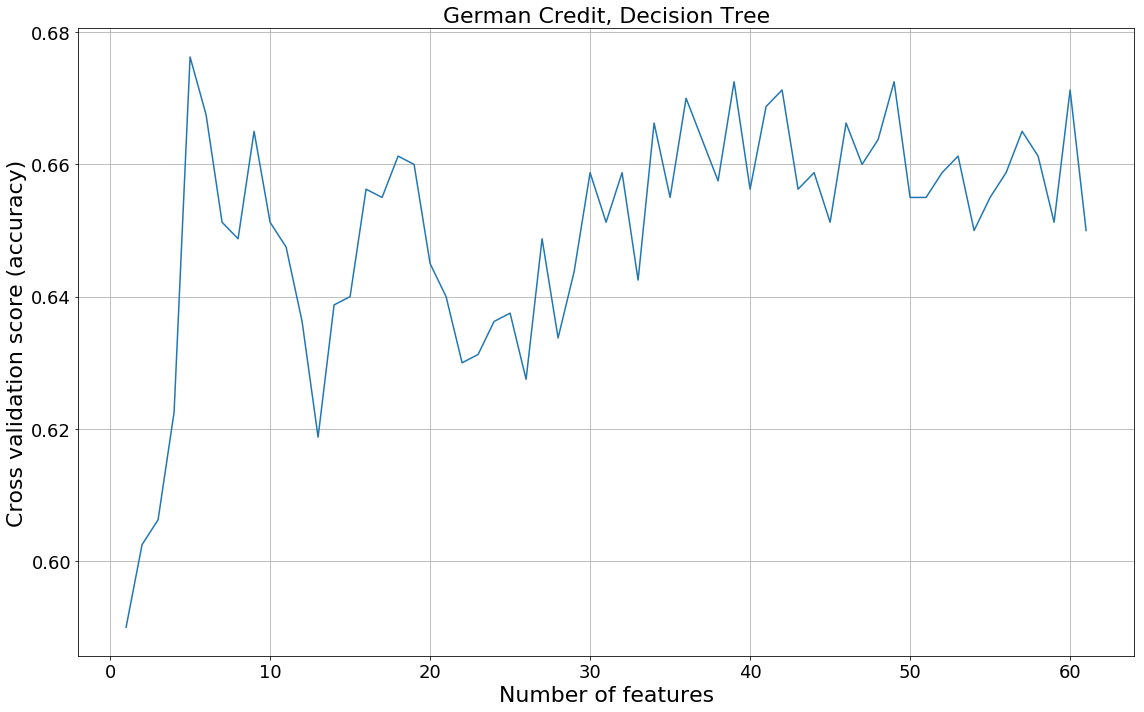

In [28]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(16, 10));
plt.grid(True);
plt.title('German Credit, Decision Tree', fontsize=22);
plt.xlabel("Number of features", fontsize=22);
plt.ylabel("Cross validation score (accuracy)", fontsize=22);
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.tight_layout();
#plt.savefig('out/german_credit-rfe.png');